# 📈 Previsão de Preços do Café no Brasil  
## Uma Análise da Eficácia do Modelo ARIMA no Contexto de Commodities  

## 📜 1. Resumo  

Este trabalho analisa a previsão dos preços do café no Brasil utilizando o modelo de séries temporais **ARIMA**, no contexto de crescente importância das commodities para a economia nacional.  

> **Destaque:** Entre 2000 e 2014, o boom das commodities resultou em significativa redução da pobreza e desigualdade na América Latina, com o Brasil como um dos maiores exportadores, incluindo o café.  

O estudo cobre:  
- Coleta de dados diários (CEPEA/ESALQ) para 2023.  
- Modelagem com **ARIMA (4, 1, 7)**, obtendo **MAPE = 1,64%**.  
- Propostas de projeção para 2026.  

*1.1 Mais detalhes:*

Este trabalho analisa a previsão dos preços do café no Brasil, utilizando o modelo de séries temporais ARIMA, em um contexto de crescente importância das commodities para a economia nacional. Entre 2000 e 2014, o boom das commodities resultou em uma significativa redução da pobreza e da desigualdade na América Latina, com o Brasil se destacando como um dos maiores exportadores de diversas commodities, incluindo o café. A volatilidade dos preços do café no mercado internacional representa um desafio para produtores, investidores e formuladores de políticas públicas, tornando essencial a previsão precisa desses preços.
A metodologia empregada envolveu a coleta de dados diários de preços do café de 2023 por saca de 60kg a partir do CEPEA/ESALQ, seguida da aplicação do modelo ARIMA para prever os preços de 2024. A análise incluiu testes de estacionaridade, como o teste de Dickey-Fuller aumentado, que indicou a necessidade de diferenciação para tornar os dados estacionários. Após a diferenciação, o modelo ARIMA (4, 1, 7) foi identificado como o mais adequado, com um valor AIC de 2005,77.
Os resultados preliminares mostraram que o modelo ARIMA é eficaz na previsão dos preços do café, com um erro percentual absoluto médio (MAPE) de 1,64%, evidenciando sua precisão. A pesquisa não apenas valida a aplicabilidade do modelo ARIMA, mas também sugere sua utilidade na tomada de decisões no mercado de commodities. Além da previsão para os primeiros 60 dias de 2024, o estudo também propõe análises futuras para 2026, contribuindo para um entendimento mais profundo das tendências de preços do café e abrindo caminho para investigações sobre a aplicação de modelos de séries temporais em outras commodities.


## 📂 2. Dataset  

Os dados foram coletados a partir do [CEPEA/ESALQ](https://www.cepea.org.br/br/indicador/cafe.aspx), contendo preços diários do café em 2023.  

Também foram usados dados do **Comex Stat** para comprovar a importância econômica do café, com base nas exportações brasileiras.


*2.1 Source 🌐*

### 🌐 2.1 Fonte de Dados  

- **CEPEA/ESALQ** — Preços de café (2023 e início de 2024): https://www.cepea.org.br/br/indicador/cafe.aspx

*2.2 Informações Adicionais ℹ️*

- [📂 Repositório no GitHub](https://github.com/GabrielAlbuquerqueDeOliveira/Time-Series-Analysis)

## 🛠️ 4. Informações sobre os Dados  

### Bibliotecas 🐍

Bibliotecas python utilizadas:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

*4.1 Carregando os Dados*

Carregando os dados fornecidos pelo CEPEA org. Consiste em 1 arquivo de excel:

In [3]:
df = pd.read_excel('https://github.com/GabrielAlbuquerqueDeOliveira/Time-Series-Analysis/raw/refs/heads/main/cepea-consulta-modificadaxls.xlsx')

*4.2 Acessando os Dados*

Dados do preço por saca de 60kg de café por data de 2023.

In [4]:
print("Preço do café por saca de 60kg: 2023")
df

Preço do café por saca de 60kg: 2023


,Data,Preco
0,02/01/2023,"1.031,20"
1,03/01/2023,"1.034,46"
2,04/01/2023,"1.021,50"
3,05/01/2023,"1.020,40"
4,06/01/2023,"1.023,47"
...,...,...
243,21/12/2023,"999,11"
244,22/12/2023,"990,17"
245,26/12/2023,"999,76"
246,27/12/2023,"1.007,36"


*4.3 Data Info*

informação dos dados do café.

In [5]:
print("Preço do café: 2023 informações")
df.info()

Preço do café: 2023 informações
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    248 non-null    object
 1   Preco   248 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


## 🧹 5. Preparação dos Dados

Nesta etapa:

Conversão da coluna Data para o formato datetime.

Conversão dos preços do formato brasileiro para o americano.


Inicialmente, vamos garantir que a coluna "Data" esteja no formato datetime e vamos transformar o valor do preço do formato brasileiro ("," para os decimais) para o formato americano ("." para os decimais e "," para os milhares).

In [6]:

# Vamos nos certificar de que a coluna 'Data' esteja no formato datetime e seja o índice do DataFrame
print(df.columns)
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df.set_index('Data', inplace=True)

df['Preco'] = df['Preco'].str.replace('.', '', regex=False)  # Remove o ponto
df['Preco'] = df['Preco'].str.replace(',', '.', regex=False)  # Substitui a vírgula por ponto
# Agora você pode converter a coluna para float
df['Preco'] = df['Preco'].astype(float)

Index(['Data', 'Preco'], dtype='object')


## 5.1 Testando a Estacionaridade da série

Para testar se nossa série estacionária é estacionária, ou seja se suas médias e variâncias se mantém constantes ao longo do tempo, 
vamos usar o teste Dickey Fuller Aumentado (ADF), que identifica a presença de uma raiz unitária, indicando que a série temporal possuí tendência estocástica de variar do longo do tempo.

In [7]:
# Como temos um DataFrame df com uma coluna 'Data' que contém nossas séries temporais

from statsmodels.tsa.stattools import adfuller
# Realizando o teste ADF
result = adfuller(df['Preco'])


In [8]:
# Exibindo os resultados do teste ADF
# Exibindo valores
print(f'Estatística de teste ADF: {result[0]}')
print(f'Valor-p: {result[1]}')
print(f'Nº de lags usados: {result[2]}')
print(f'Nº de observações usadas: {result[3]}')
print('Valores críticos:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

Estatística de teste ADF: -1.0032867981978746
Valor-p: 0.7520636301255516
Nº de lags usados: 2
Nº de observações usadas: 245
Valores críticos:
   1%: -3.4573260719088132
   5%: -2.873410402808354
   10%: -2.573095980841316


    1. Estatística ADF: -1.0032867981978744
Esta é a estatística do teste ADF. Um valor mais negativo indica uma maior evidência contra a hipótese nula de que a série temporal tem uma raiz unitária (ou seja, é não estacionária). Neste caso, o valor de -1.0033 não é suficientemente negativo para rejeitar a hipótese nula.

    2. Valor p: 0.7520636301255517

O valor p associado ao teste ADF. Um valor p maior que 0.05 sugere que não há evidência suficiente para rejeitar a hipótese nula. Neste caso, 0.7521 indica que a série temporal é provavelmente não estacionária.

**Resultado Dickey-Fuller Aumentado (ADF):**

Hipótese nula (H₀): A série possui raiz unitária (não estacionária).

Hipótese alternativa (H₁): A série é estacionária.

O teste indicou que a série original não era estacionária, sendo necessária a diferenciação

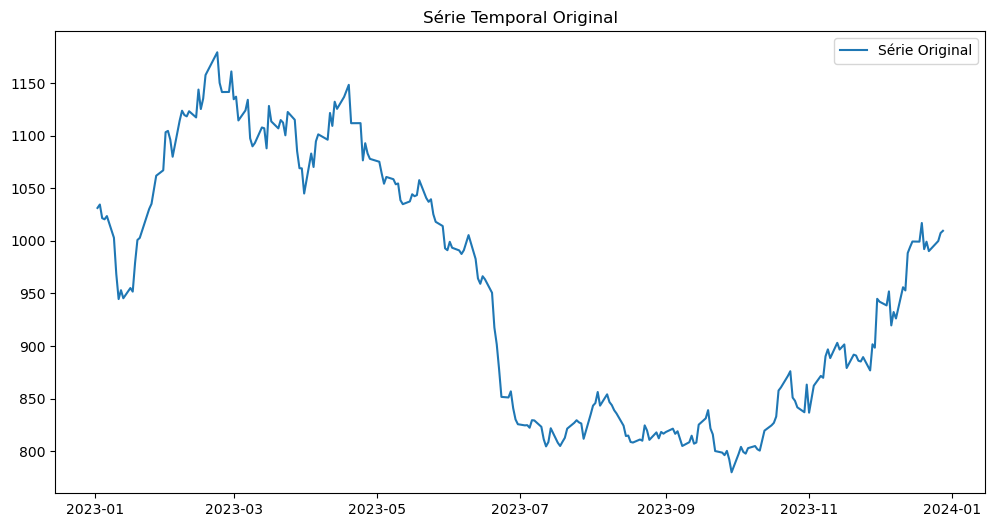

In [9]:
# Visualizando a série original
plt.figure(figsize=(12, 6))
plt.plot(df['Preco'], label='Série Original')
plt.title('Série Temporal Original')
plt.legend()
plt.show()

## 5.2 Tornando a série estacionária

Vimos que a série temporal não é estacionária.Para tornar a série estacionária, vamos aplicar a técnica da diferenciação.

In [10]:
# Diferenciação da série para torná-la estacionária
df['Preco_diff'] = df['Preco'].diff().dropna()

In [11]:
#Tinha valores ausentes (nans). Tratando eles. Removendo linhas com valores ausentes.
print(df['Preco_diff'].isnull().sum())
df = df.dropna(subset=['Preco_diff'])

1


In [12]:
# Visualizando a série diferenciada
df

,Preco,Preco_diff
Data,,
2023-01-03,1034.46,3.26
2023-01-04,1021.50,-12.96
2023-01-05,1020.40,-1.10
2023-01-06,1023.47,3.07
2023-01-09,1002.85,-20.62
...,...,...
2023-12-21,999.11,7.06
2023-12-22,990.17,-8.94
2023-12-26,999.76,9.59


In [13]:
# Realizando novamente o teste ADF na série diferenciada
result_diff = adfuller(df['Preco_diff'])

In [14]:
# Exibindo valores
print(f'Estatística de teste ADF: {result_diff[0]}')
print(f'Valor-p: {result_diff[1]}')
print(f'Nº de lags usados: {result_diff[2]}')
print(f'Nº de observações usadas: {result_diff[3]}')
print('Valores críticos:')
for key, value in result_diff[4].items():
    print(f'   {key}: {value}')


Estatística de teste ADF: -9.87664379026395
Valor-p: 3.866695554356724e-17
Nº de lags usados: 1
Nº de observações usadas: 245
Valores críticos:
   1%: -3.4573260719088132
   5%: -2.873410402808354
   10%: -2.573095980841316


Após a diferenciação a série apresentou:

Estatística de teste ADF: -9.87664379026395 
    Esta é a estatística do teste ADF. Um valor mais negativo indica uma maior evidência contra a hipótese nula de que a série temporal tem uma raiz unitária (ou seja, é não estacionária). Neste caso, o valor de -9.8766 é bastante negativo, sugerindo que há uma forte evidência de que a série é estacionária.

Valor-p: 3.866695554356724e-1
    • O valor p associado ao teste ADF. Um valor p muito pequeno (menor que 0.05) indica que você pode rejeitar a hipótese nula. Neste caso, 3.87e-17 é extremamente pequeno, sugerindo que a série temporal é estacionária.
    

Conclusão:
Com base nos resultados do teste ADF:
• A estatística ADF de -9.8766 e o valor p de 3.87e-17 indicam que há evidência suficiente para rejeitar a hipótese nula de que a série temporal tem uma raiz unitária.

Portanto, podemos concluir que a série temporal que você testou é estacionária, o que é um pré-requisito importante para aplicar modelos de séries temporais, como ARIMA.

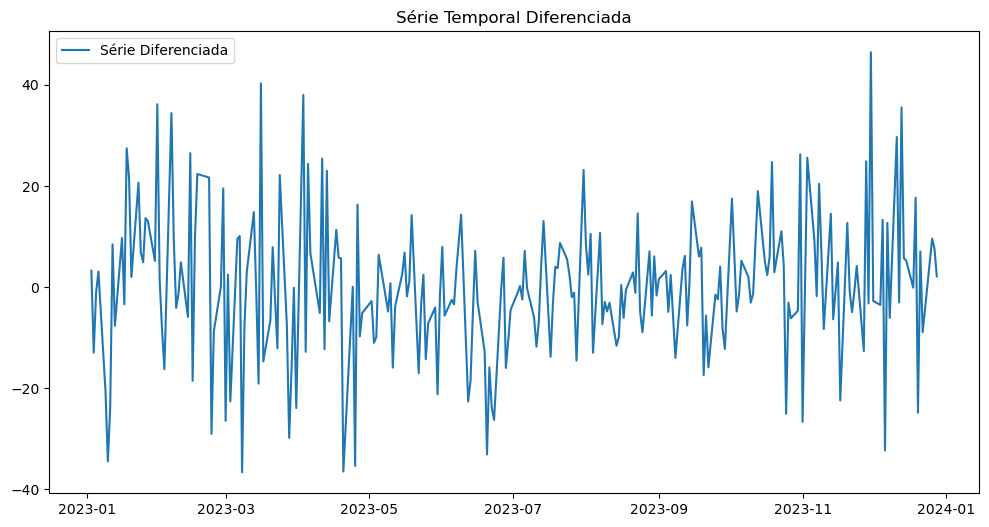

In [15]:
# Visualizando a série diferenciada
plt.figure(figsize=(12, 6))
plt.plot(df['Preco_diff'], label='Série Diferenciada')
plt.title('Série Temporal Diferenciada')
plt.legend()
plt.show()

Aqui temos o gráfico de linhas da série temporal agora estacionária! 
É nítida a diferença do comportamento da série não estacionária para a estacionária ao longo do tempo, a estacionária permanecendo muito mais constânte.

**Resumo série estacionária:**

Foi aplicada a técnica de diferenciação, resultando em:

Estatística ADF: -9.8766

Valor-p: ~3.87e-17 (<< 0.05)

✅ Conclusão: Série estacionária, apta para modelagem ARIMA

## 5.3 Determinando a ordem apropriada dos parâmetros (p) e (q) do modelo ARIMA

Para isso, podemos usar os gráficos de Autocorrelação (ACF) e Autocorrelação Parcial (PACF). Esses gráficos ajudam a identificar quantos lags devem ser incluídos na parte autorregressiva (AR) e na parte de média móvel (MA) do modelo.

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Se a ACF cai rapidamente para zero após um certo número de lags, isso sugere que um modelo de média móvel (MA) pode ser apropriado. O número de lags significativos antes que a ACF se torne insignificante pode indicar o valor de (q)


<Figure size 1200x600 with 0 Axes>

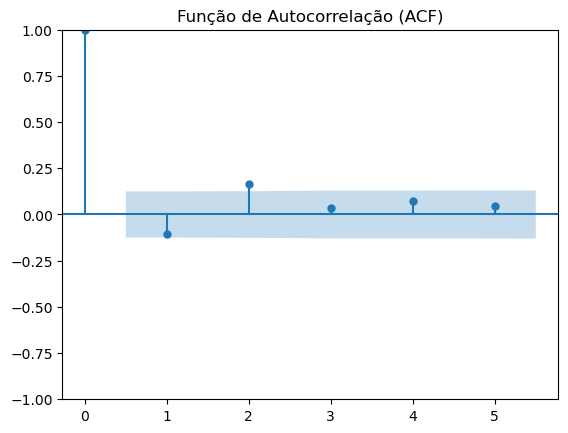

In [17]:
#Plotando ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Preco_diff'].dropna(), lags=5)  # Ajuste o número de lags conforme necessário
plt.title('Função de Autocorrelação (ACF)')
plt.show()

Observamos que a função de autocorrelação (ACF) caiu rapidamente após um curto número de lags. 
Então para essa série temporal o modelo de média móvel (MA) pode ser apropriada.


Agora vamos para o PACF:
Se a PACF cai rapidamente para zero após um certo número de lags, isso sugere que um modelo autorregressivo (AR) pode ser apropriado. O número de lags significativos antes que a PACF se torne insignificante pode indicar o valor de (p).



<Figure size 1200x600 with 0 Axes>

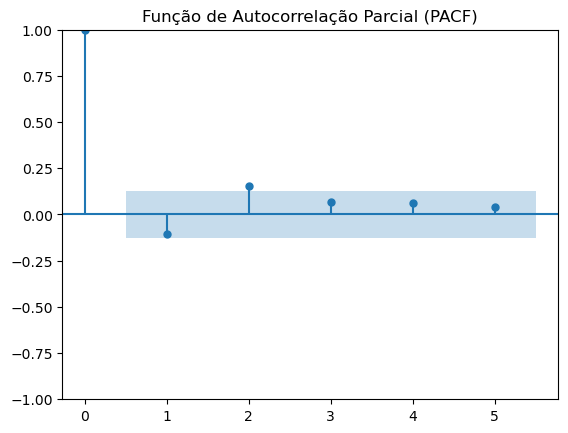

In [18]:
# Plotando PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['Preco_diff'].dropna(), lags=5)  # Ajuste o número de lags conforme necessário
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.show()

Para o PACF o número também cai após um curto número de lags, indicando que para nossa série um modelo autoregressivo (AR) pode ser apropriado.

**Resumo definição de parâmetros (p, d, q):**

Para definir a ordem do ARIMA, foram analisados:

Função de Autocorrelação (ACF) → Indica q (parte MA).

Função de Autocorrelação Parcial (PACF) → Indica p (parte AR).

## 5.4 AIC para descobrir o melhor número de (p) e (q) para nosso modelo ARIMA

Para descobrirmos o número ideal, vamos usar o teste AIC:

No código seguinte, vamos fazer um loop para o AIC testar diferentes combinações de valores de p e q, de 0 a 10, para testar qual os valores que melhor se adaptam.

obs: O valor de d, mantemos fixo como 1 pois ele representa o número de diferenciações necessárias para estacionar a série, que para nossa série temporal foi uma.

In [ ]:
# Lista para armazenar os resultados #
results_aic = []

# Testando diferentes combinações de p, d e q #
for p in range(10):  # Testando p = 0, 1, 2
    for q in range(10):  # Testando q = 0, 1, 2
        try:
            model = ARIMA(df['Preco_diff'], order=(p, 1, q))  # d = 1, ajustando p e q
            model_fit = model.fit()
            aic = model_fit.aic
            results_aic.append((p, 1, q, aic))  # Armazenando os parâmetros e o AIC
        except:
            continue  # Ignora combinações que falham

In [20]:
# Convertendo os resultados em um DataFrame
results_df_aic = pd.DataFrame(results_aic, columns=['p', 'd', 'q', 'AIC'])

results_df_aic

,p,d,q,AIC
0,0,1,0,2203.728194
1,0,1,1,2013.457469
2,0,1,2,2011.498366
3,0,1,3,2008.753417
4,0,1,4,2010.669988
...,...,...,...,...
95,9,1,5,2013.116999
96,9,1,6,2015.140049
97,9,1,7,2016.265740
98,9,1,8,2013.224502


Encontrando o modelo com o menor número de AIC:


In [21]:
best_model = results_df_aic.loc[results_df_aic['AIC'].idxmin()]
print(f'Melhor modelo: ARIMA({best_model["p"]}, {best_model["d"]}, {best_model["q"]}) com AIC = {best_model["AIC"]}')

best_model

Melhor modelo: ARIMA(4.0, 1.0, 7.0) com AIC = 2005.7759840205688


p         4.000000
d         1.000000
q         7.000000
AIC    2005.775984
Name: 47, dtype: float64

Quanto menor o número de AIC melhor a adaptação do modelo.

Para o caso de nossa série, o menor número de AIC foi obtido para as combinações:

p = 4
d = 1
q = 7

Isso seria um modelo ARIMA (4, 1, 7)

Agora com o melhor modelo. Vamos realizar uma o diagnóstico do modelo. 
Isso envolve verificar os resíduos do modelo para garantir que eles se comportem como uma série estacionária e que o modelo esteja adequadamente ajustado. 

## 5.5 Verificação dos resíduos
Resíduos são as diferenças entre os valores observados e os valores previstos pelo modelo. 

Por que eles são importantes?

Eles ajudam a avaliar a qualidade do modelo: resíduos pequenos indicam um bom ajuste.

Analisando os resíduos, podemos verificar se o modelo está adequado — por exemplo, se eles têm um padrão (o que indicaria problema no modelo) ou se estão distribuídos aleatoriamente (o que é desejável).

In [22]:
import matplotlib.pyplot as plt

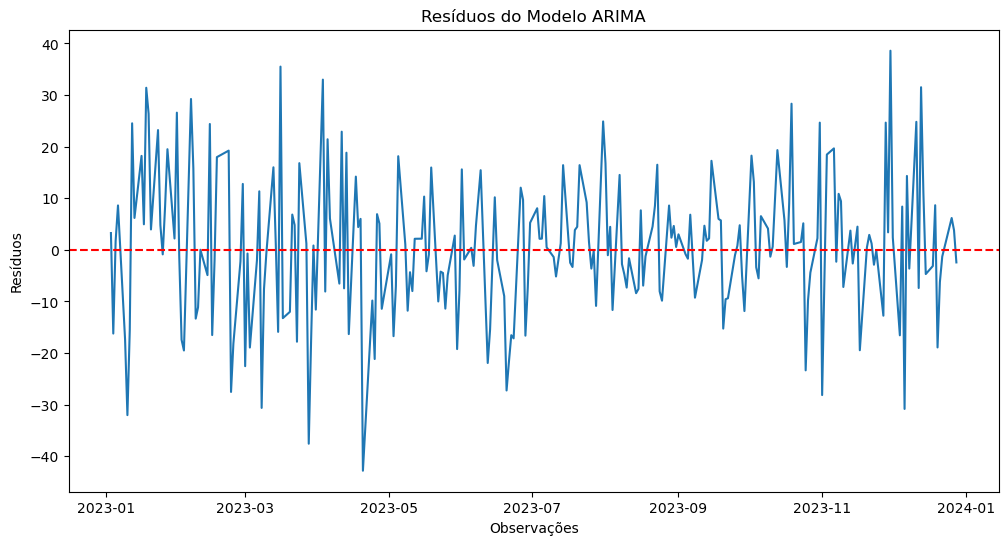

In [23]:
# Supondo que model_fit seja o modelo ajustado
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Resíduos do Modelo ARIMA')
plt.xlabel('Observações')
plt.ylabel('Resíduos')
plt.axhline(0, color='red', linestyle='--')
plt.show()

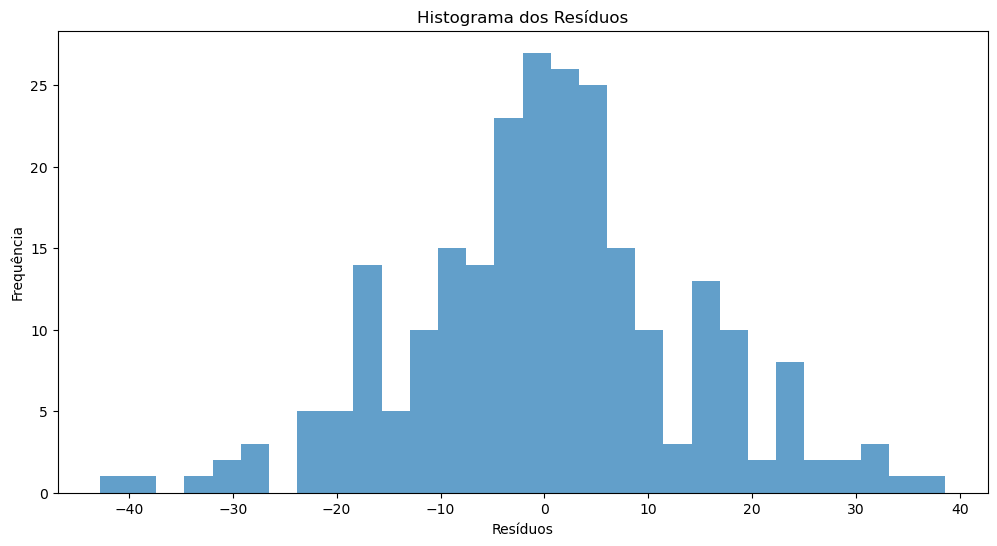

In [24]:
#Um histograma dos resíduos pode ajudar a verificar a normalidade.
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

O gráfico indica que provavelmente os resíduos estão normalmente distribuídos, mas vamos ter a certeza:

Teste de normalidade

Vamos usar o teste de Shapiro-Wilk para verificar a normalidade dos resíduos.

In [25]:
from scipy import stats

# Teste de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print('Estatística Shapiro-Wilk:', shapiro_test.statistic)
print('Valor p:', shapiro_test.pvalue)
#modelo esta normalmente distrubuido

Estatística Shapiro-Wilk: 0.9911791130350454
Valor p: 0.1427917915288623


No teste de Shapiro-Wilk obtivemos os seguintes valores: 

Estatística Shapiro-Wilk: 0.9912 (aproximadamente):

    É o valor da estatística do teste, que varia entre 0 e 1.

    Quanto mais próximo de 1, maior a evidência de que a amostra segue uma distribuição normal.

Valor-p: 0.1428:

    É a probabilidade de obter o resultado observado, assumindo que a hipótese nula seja verdadeira.

    A hipótese nula do teste Shapiro-Wilk é que a amostra é normalmente distribuída.

    Um valor-p maior que 0.05 (nível comum de significância) indica que não rejeitamos a hipótese nula — ou seja, não há evidência suficiente para dizer que os dados não são normais.

Assim, podemos dizer que os resíduos estão normalmente distribuídos.

## 5.6 Autocorrelação dos resíduos

A ausência de autocorrelação dos resíduos é muito importânte para o modelo ARIMA pois indica que o modelo está capturando adequadamente a estrutura temporal dos dados e que os resíduos se comportam como uma série aleatória.

Para checar essa autocorrelação vamos utilizar o teste Ljung-box.

In [26]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_test)

     lb_stat  lb_pvalue
10  1.554193   0.998756


Não há evidência suficiente para afirmar que os resíduos do seu modelo apresentam autocorrelação.

Como o valor-p (0.9987) é muito alto, bem acima de 0.05, não rejeitamos a hipótese nula do teste.

A hipótese nula do Ljung-Box é que não há autocorrelação significativa nos resíduos até a defasagem testada.

Portanto, esse resultado indica que os resíduos são aleatórios, sem padrão autocorrelacionado, o que é um bom sinal para o ajuste do modelo ARIMA.

## 5.7 verificação da estacionaridade nos resíduos

Próximo passo é verificar a estacionaridade nos resíduos

In [27]:
#verificação de estacionaridade nos resíduos
from statsmodels.tsa.stattools import kpss

# Função para realizar o teste KPSS
def kpss_test(series):
    statistic, p_value, lags, critical_values = kpss(series)
    print('Estatística KPSS:', statistic)
    print('Valor p:', p_value)
    print('Lags usados:', lags)
    print('Valores críticos:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')
    return p_value

In [ ]:
# Testando a estacionaridade dos resíduos
kpss_test(residuals)

Estatística KPSS: 0.19443917715721554
Valor p: 0.1
Lags usados: 0
Valores críticos:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
   
A série temporal que você testou é considerada estacionária, pois a estatística KPSS é menor que os valores críticos e o valor p é maior que 0.05. Isso sugere que você pode prosseguir com a modelagem de séries temporais, como ARIMA, sem a necessidade de diferenciação adicional para tornar a série estacionária.

## 📈6. Realizando a Previsão

Agora vamos enfim realizar a previsão do preço do café:

Vamos ajudar o modelo ARIMA com o que vimos que é sua melhor ordem.

In [ ]:
# Ajustar o modelo ARIMA
model = ARIMA(df['Preco'], order=(4, 1, 7))  # (p, d, q)
model_fit = model.fit()

In [ ]:
# Fazer previsões
forecast = model_fit.forecast(steps=61) #prever para os próximos x períodos

In [31]:
forecast

247    1011.023129
248    1013.023127
249    1014.972756
250    1015.358004
251    1014.420882
          ...     
303    1017.921932
304    1018.177608
305    1018.895626
306    1018.815915
307    1018.086958
Name: predicted_mean, Length: 61, dtype: float64

In [32]:
# Transformar forecast do tipo Series para Dataframe.
forecast_df = forecast.to_frame(name='predicted_mean').reset_index(drop=True)

forecast_df

,predicted_mean
0,1011.023129
1,1013.023127
2,1014.972756
3,1015.358004
4,1014.420882
...,...
56,1017.921932
57,1018.177608
58,1018.895626
59,1018.815915


Agora temos os valores previstos para os primeiros 61 dias de 2024.

Vamos comparar os valores previstos com os valores observados:

Para isso iremos baixar os dados do CEPEA, para os primeiros dias de 2024 também para fazermos a comparação.

In [33]:
cafe_2024_real = pd.read_excel('https://github.com/GabrielAlbuquerqueDeOliveira/Time-Series-Analysis/raw/refs/heads/main/Preco_cafe_2024_observado.xlsx')

cafe_2024_real.rename(columns={'À vista R$': 'Preco'}, inplace=True)

cafe_2024_real['Preco'] = cafe_2024_real['Preco'].str.replace('.', '', regex=False)  # Remove o ponto
cafe_2024_real['Preco'] = cafe_2024_real['Preco'].str.replace(',', '.', regex=False)  # Substitui a vírgula por ponto
# Converter a coluna para float
cafe_2024_real['Preco'] = cafe_2024_real['Preco'].astype(float)

In [34]:
cafe_2024_real

,Data,Preco
0,02/01/2024,1003.74
1,03/01/2024,994.00
2,04/01/2024,990.46
3,05/01/2024,981.67
4,08/01/2024,973.26
...,...,...
246,20/12/2024,2236.76
247,23/12/2024,2230.14
248,26/12/2024,2220.55
249,27/12/2024,2235.80


In [35]:
# garante que não haja problemas de índice
forecast = forecast.reset_index(drop=True)
cafe_2024_real = cafe_2024_real.reset_index(drop=True)

# cria novo DataFrame com as colunas desejadas
merged_df = pd.concat(
    [
        cafe_2024_real[['Data', 'Preco']],
        forecast_df[['predicted_mean']]
    ],
    axis=1
)

# renomeando
merged_df = merged_df.rename(columns={'Preco': 'Real', 'predicted_mean': 'Previsto'})

In [36]:
merged_df

,Data,Real,Previsto
0,02/01/2024,1003.74,1011.023129
1,03/01/2024,994.00,1013.023127
2,04/01/2024,990.46,1014.972756
3,05/01/2024,981.67,1015.358004
4,08/01/2024,973.26,1014.420882
...,...,...,...
246,20/12/2024,2236.76,NaN
247,23/12/2024,2230.14,NaN
248,26/12/2024,2220.55,NaN
249,27/12/2024,2235.80,NaN


In [37]:
merged_df = merged_df.dropna()

merged_df


,Data,Real,Previsto
0,02/01/2024,1003.74,1011.023129
1,03/01/2024,994.00,1013.023127
2,04/01/2024,990.46,1014.972756
3,05/01/2024,981.67,1015.358004
4,08/01/2024,973.26,1014.420882
...,...,...,...
56,22/03/2024,1020.95,1017.921932
57,25/03/2024,1020.86,1018.177608
58,26/03/2024,1026.04,1018.895626
59,27/03/2024,1037.78,1018.815915


Vamos visualizar o gráfico do Preço Real vs Preço Previsto para os 60 primeiros dias de 2024:

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_4460\2594875516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Dia'] = range(1, len(merged_df) + 1)


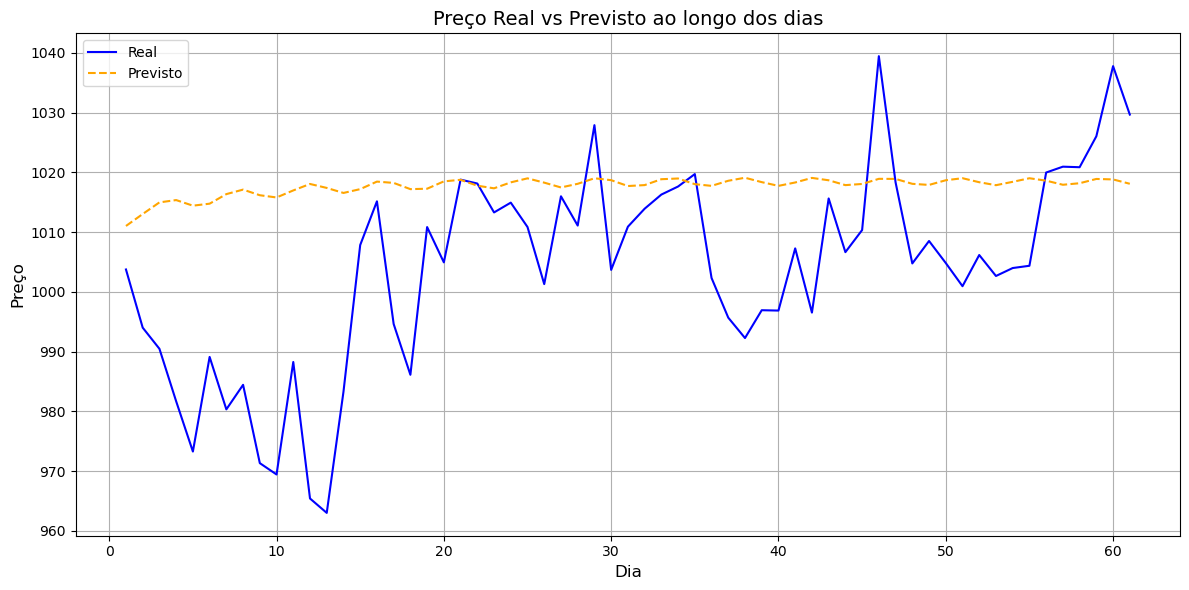

In [41]:
# Criar coluna Dia
merged_df['Dia'] = range(1, len(merged_df) + 1)

plt.figure(figsize=(12,6))

# Linha do valor real
plt.plot(merged_df['Dia'], merged_df['Real'], label='Real', color='blue')

# Linha do valor previsto
plt.plot(merged_df['Dia'], merged_df['Previsto'], label='Previsto', color='orange', linestyle='--')

# Configurações do gráfico
plt.title('Preço Real vs Previsto ao longo dos dias', fontsize=14)
plt.xlabel('Dia', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Gráfico do preço histórico do café para o ano de 2024 e o da previsão para os primeiros 60 dias de 2024.

## 📊7. Avaliação do Modelo!

Vamos usar métricas de avaliação de desempenho de modelos para avaliar a eficácia de nosso modelo:

In [39]:
# Passo 2: Calcular as métricas de avaliação
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_real = merged_df['Real']
y_previsto = merged_df['Previsto']

rmse = np.sqrt(mean_squared_error(y_real, y_previsto))
mae = mean_absolute_error(y_real, y_previsto)
mape = np.mean(np.abs((y_real - y_previsto) / y_real)) * 100

In [40]:
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape:.2f}%')

RMSE: 21.090341871157325
MAE: 16.22042296598669
MAPE: 1.64%


Traduzindo esses dados:

1. RMSE (Root Mean Squared Error): 21.090341871157325
    O RMSE mede a média das diferenças quadráticas entre os valores previstos e os valores reais. Um RMSE menor indica um modelo melhor, pois significa que as previsões estão mais próximas dos valores reais.

2. MAE (Mean Absolute Error): 16.22042296598669
    O MAE mede a média das diferenças absolutas entre as previsões e os valores reais. Assim como o RMSE, um MAE menor é desejável.
    O valor de 16.24 deve ser avaliado em relação à escala dos dados. Como os valores reais estão na faixa de milhares, esse MAE representa que nosso modelo de previsão está bem aceitável.

3. MAPE (Mean Absolute Percentage Error): 1.64%
    O MAPE expressa o erro como uma porcentagem, o que facilita a interpretação. Um MAPE de 1.64% é geralmente considerado muito bom, especialmente em contextos onde a precisão é crítica. Em muitos casos, um MAPE abaixo de 5% é considerado excelente.

## ✅8. Conclusão!

O presente estudo demonstrou que o modelo ARIMA, configurado na forma (4, 1, 7), apresentou elevado desempenho na previsão dos preços por saca de 60kg do café no Brasil, alcançando um MAPE de 1,64%, o que evidencia sua precisão e adequação para o contexto analisado. A aplicação de testes estatísticos — como ADF, KPSS, Shapiro-Wilk e Ljung-Box — confirmou que os pressupostos fundamentais do modelo foram atendidos, garantindo a confiabilidade dos resultados obtidos.

A análise reforça a relevância do uso de modelos de séries temporais para commodities, sobretudo em mercados sujeitos à volatilidade como o do café. A capacidade de prever preços com acurácia oferece subsídios valiosos para produtores, exportadores, investidores e formuladores de políticas, permitindo decisões mais estratégicas e mitigando riscos associados às oscilações de mercado.

Por fim, o trabalho não apenas valida a eficácia do ARIMA na previsão de preços do café, como também abre caminho para investigações futuras envolvendo outros métodos, como modelos SARIMA, Prophet e abordagens de Machine Learning, além de sua aplicação a diferentes commodities. Dessa forma, contribui para o fortalecimento de ferramentas preditivas no setor agroexportador brasileiro, com potencial impacto econômico e social.